<a href="https://colab.research.google.com/github/Snurfsbsb/banco-de-dados/blob/main/atividade_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 

In [3]:
url = 'https://raw.githubusercontent.com/Snurfsbsb/banco-de-dados/main/Real%20estate.csv'

df = pd.read_csv(url,sep=',')
df.head(2)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2


In [4]:
df.shape

(414, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
No,0
X1 transaction date,0
X2 house age,0
X3 distance to the nearest MRT station,0
X4 number of convenience stores,0
X5 latitude,0
X6 longitude,0
Y house price of unit area,0


In [8]:
print("Valores Duplicados:",df.duplicated().sum())

Valores Duplicados: 0


In [9]:
df.head(2)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2


In [14]:
sorted(df["X1 transaction date"].unique())

[2012.667,
 2012.75,
 2012.833,
 2012.917,
 2013.0,
 2013.083,
 2013.167,
 2013.25,
 2013.333,
 2013.417,
 2013.5,
 2013.583]

<Axes: ylabel='Density'>

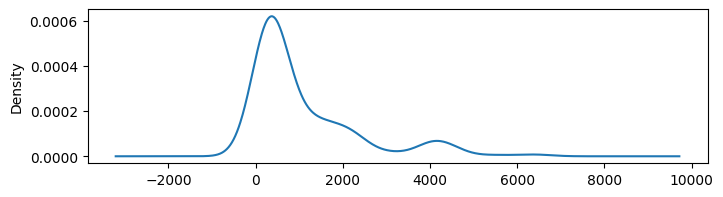

In [15]:
df['X3 distance to the nearest MRT station'].plot(kind='kde', figsize=(8,2))

<Axes: >

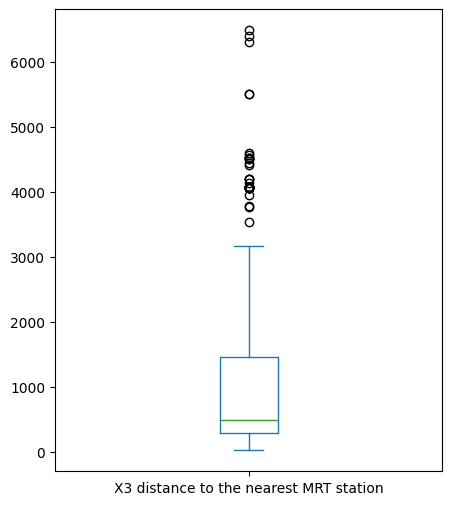

In [17]:
df['X3 distance to the nearest MRT station'].plot(kind='box', figsize=(5,6))

In [18]:
df["X3 distance to the nearest MRT station"].agg(["min","mean","median","max","std"]).to_frame().T

,min,mean,median,max,std
X3 distance to the nearest MRT station,23.38284,1083.885689,492.2313,6488.021,1262.109595


<Axes: >

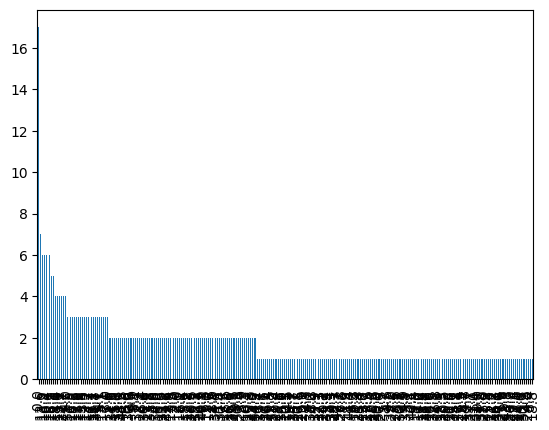

In [20]:

df["X2 house age"].value_counts().plot(kind='bar')

<Axes: xlabel='X4 number of convenience stores'>

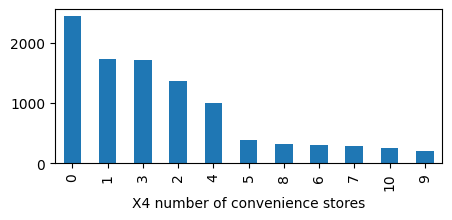

In [21]:
df.groupby('X4 number of convenience stores')['X3 distance to the nearest MRT station'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(5,2))

In [23]:
import matplotlib.pyplot as plt

def imprime_graficos(atributo):
  fig, a = plt.subplots(1,2, figsize=(8,2))
  #a - é um array of objetos de eixo
  df[atributo].value_counts().plot(kind='bar', ax=a[0], subplots=True)
  df.groupby(atributo)['X3 distance to the nearest MRT station'].mean().plot(kind='bar', ax=a[1], subplots=True)

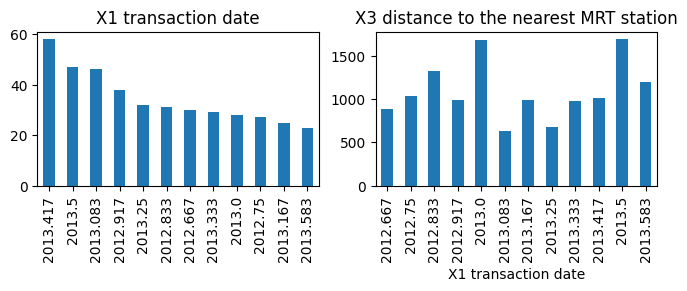

In [24]:
imprime_graficos('X1 transaction date')

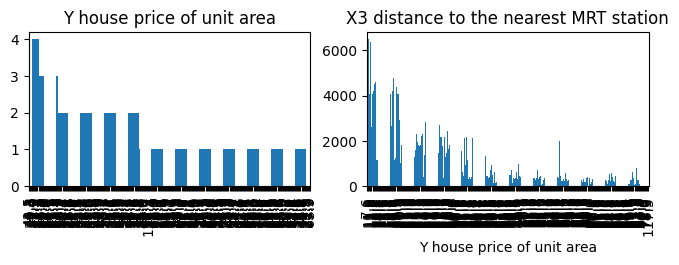

In [25]:
imprime_graficos("Y house price of unit area")

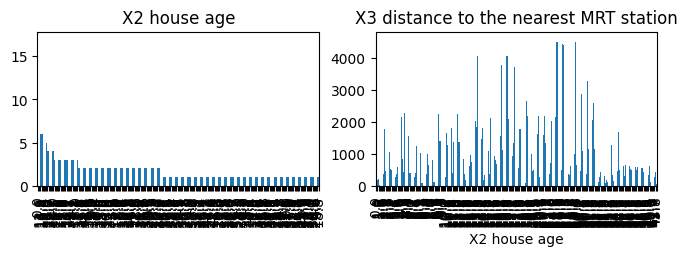

In [26]:
imprime_graficos("X2 house age")

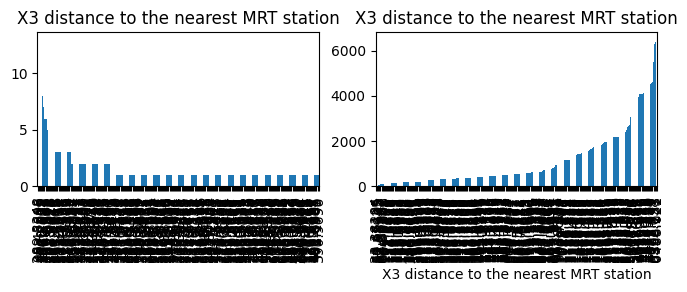

In [28]:
imprime_graficos("X3 distance to the nearest MRT station")

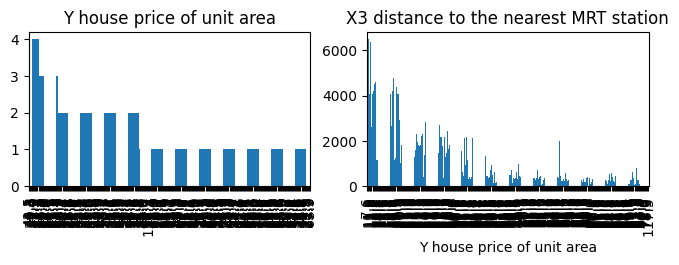

In [29]:
imprime_graficos("Y house price of unit area")

In [30]:
def imprime_scatter(colunas, qtd_colunas = 3):
    
    num_colunas = len(colunas)
    if num_colunas % qtd_colunas > 0:
        num_linhas = int(num_colunas/qtd_colunas) + 1
    else:
        num_linhas = int(num_colunas/qtd_colunas)
    altura_figura = 4 * num_linhas
    fig, a = plt.subplots(num_linhas,qtd_colunas, figsize=(12,altura_figura))
    posicao = 0
    for coluna in colunas:
        posicao_linha = posicao % qtd_colunas
        posicao_coluna = int(posicao / qtd_colunas)
        df[[coluna, 'X3 distance to the nearest MRT station']].plot(kind='scatter', x = coluna, y = 'X3 distance to the nearest MRT station', 
                                ax=a[posicao_coluna][posicao_linha], 
                                subplots=True)

        posicao += 1

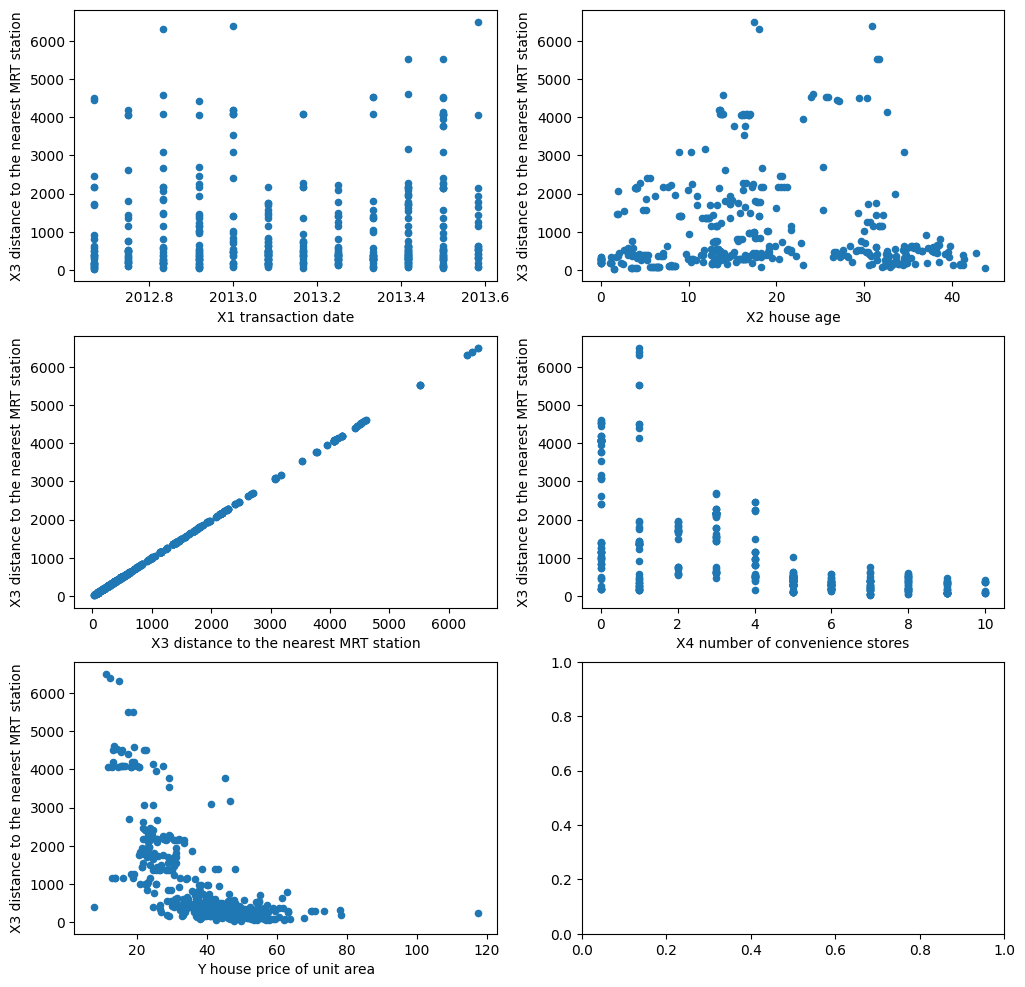

In [31]:
imprime_scatter(["X1 transaction date","X2 house age","X3 distance to the nearest MRT station","X4 number of convenience stores",
                 "Y house price of unit area"], qtd_colunas = 2)

In [32]:
new_df = df[["X1 transaction date","X2 house age","X3 distance to the nearest MRT station","X4 number of convenience stores",
                 "Y house price of unit area"]]

In [33]:
new_df.head(2)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
